In [1]:
%matplotlib inline

import typing as t

import numpy as np
from IPython.display import HTML, clear_output
try:
    import pandas as pd
    import seaborn as sns
    from celluloid import Camera
    from matplotlib import pyplot as plt
    from matplotlib.animation import ArtistAnimation
except ImportError as _e:
    ! pip isntall pandas seaborn celluloid
    clear_output()
    
    import pandas as pd
    import seaborn as sns
    from celluloid import Camera
    from matplotlib import pyplot as plt
    from matplotlib.animation import ArtistAnimation

sns.set_theme(style="darkgrid")

Array = np.ndarray
GRAVITY = -9.8

In [2]:
def move_balls(
    ball_positions: Array,
    ball_velocities: Array,
    delta_t: float = 0.1,
) -> Array:
    accel_x = np.zeros(ball_positions.shape[0])
    accel_y = np.ones(ball_positions.shape[0]) * GRAVITY * delta_t  # y方向にGΔt加速
    new_velocities = np.stack((accel_x, accel_y), axis=1) + ball_velocities
    new_positions = ball_positions + delta_t * new_velocities
    return new_positions, new_velocities


def simulate_balls(
    n_balls: int,
    n_steps: int = 100,
    forward: t.Callable[[Array], Array] = move_balls,
) -> t.List[Array]:
    p = np.random.uniform(size=(n_balls, 2), low=-50, high=50.0)
    v = np.random.randn(n_balls, 2)
    results = [p]
    for _ in range(n_steps):
        p, v = forward(p, v)
        results.append(p)
    return results

def ball_animation(balls: t.Iterable[Array]) -> ArtistAnimation:
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot()
    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 50)
    camera = Camera(fig)
    for ball_batch in balls:
        ax.scatter(ball_batch[:, 0], ball_batch[:, 1], color="red", alpha=0.7)
        camera.snap()
    return camera.animate()

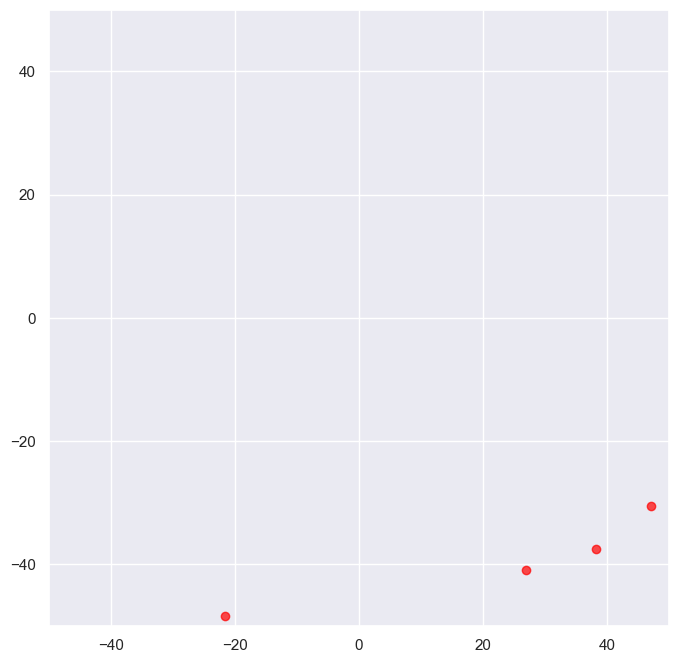

In [7]:
HTML(ball_animation(simulate_balls(20, 40)).to_jshtml())
# ball_animation(simulate_balls(20, 40)).to_jshtml()